## CNN
## Introduction
After the outbreak of covid pandemic, masks became one of the essential items for protecting the health of individuals against respiratory disease. This Computer Vision project is mainly to develop models to detect whether people within the camera field are wearing masks, not wearing masks, or wearing them improperly.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd

# Numerical Analysis
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Operating System
import os

# Deep Learning and Object Detection
import tensorflow as tf
from tensorflow import keras
import cv2

# Data Extraction
import glob
from xml.etree import ElementTree

In [3]:
print('Tensorflow Version: {}'.format(tf.__version__))
print('Keras Version: {}'.format(keras.__version__))

Tensorflow Version: 2.1.0
Keras Version: 2.2.4-tf


## Dataset exploration
https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

Mainly, there are two set, annotation and image which is xml and jpg format separately. Our 4 models share the same dataset, xml file contain the label of image like what is the label and where is the human face aligned this label.

In [4]:
annotations_directory = 'E:/jupyterdoc/archive/annotations/'
images_directory = 'E:/jupyterdoc/archive/images/'

In [5]:
def get_data(filepath):
    file_dir = os.path.join(filepath)
    if os.path.exists(file_dir):
        files = os.listdir(file_dir)
    return files

In [6]:
annotations_files = get_data(annotations_directory)
images_files = get_data(images_directory)

In [7]:
print(len(annotations_files))

853


In [8]:
annotations_files[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml',
 'maksssksksss102.xml',
 'maksssksksss103.xml',
 'maksssksksss104.xml',
 'maksssksksss105.xml',
 'maksssksksss106.xml']

In [12]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][12:-4]] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

In [14]:
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.xml'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'

# Tidy Grammatical Issue
annotations_info_df.loc[annotations_info_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'

In [15]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png


In [16]:
len(annotations_info_df)

4072

In [17]:
annotations_info_df['cropped_image_file'] = annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99


In [18]:
# Function to Show Actual Image
def render_image(image):
    plt.figure(figsize = (12, 8))
    plt.imshow(image)
    plt.show()
    
# Function to Convert BGR to RGB
def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [19]:
annotations_info_df['image_file'].iloc[0]

'maksssksksss0.png'

In [20]:
image_0_path = 'E:/jupyterdoc/archive/'+ annotations_info_df['image_file'].iloc[0]
image_0_path

'E:/jupyterdoc/archive/maksssksksss0.png'

## Simple CNN process display

In [21]:
image_0 = cv2.imread('E:/jupyterdoc/archive/images/maksssksksss0.png')
print(image_0)

[[[116 111 113]
  [113 108 110]
  [101  96  98]
  ...
  [102  59  40]
  [157  98  72]
  [186 116  86]]

 [[106 100 105]
  [100  97  99]
  [ 89  86  88]
  ...
  [ 98  58  39]
  [129  73  48]
  [173 109  79]]

 [[ 93  92  96]
  [ 88  87  91]
  [ 80  79  83]
  ...
  [ 90  57  38]
  [105  57  31]
  [157 100  71]]

 ...

 [[ 88  83  85]
  [ 90  85  87]
  [ 92  89  91]
  ...
  [ 32  27  28]
  [ 32  27  28]
  [ 33  28  29]]

 [[ 89  84  86]
  [ 92  87  89]
  [ 95  90  92]
  ...
  [ 33  28  29]
  [ 33  28  29]
  [ 34  29  30]]

 [[ 96  91  93]
  [ 99  94  96]
  [103  98 100]
  ...
  [ 34  29  30]
  [ 34  29  30]
  [ 35  30  31]]]


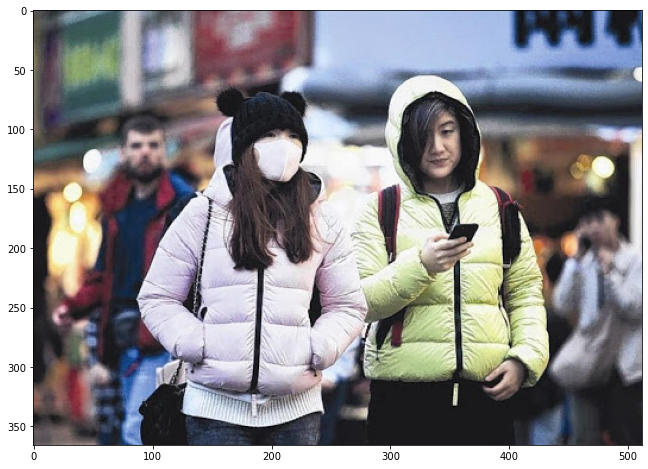

In [22]:
render_image(convert_to_RGB(image_0))

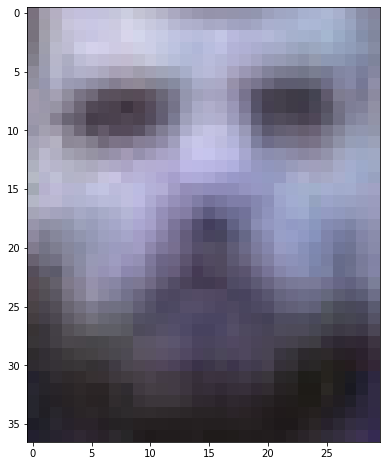

In [23]:
x = annotations_info_df['xmin'].iloc[0]
y = annotations_info_df['ymin'].iloc[0]
width = annotations_info_df['xmax'].iloc[0]
height = annotations_info_df['ymax'].iloc[0]

cropped_0 = image_0[y:height, x:width]
render_image(cropped_0)

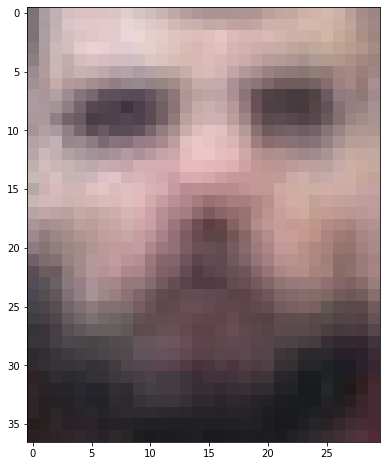

In [24]:
render_image(convert_to_RGB(cropped_0))

In [25]:
annotations_info_df['cropped_image_file'] = annotations_info_df['file'] +'.png'
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99.png


In [30]:
a = annotations_info_df['cropped_image_file'].iloc[4] + '-' + str(4) 

cropped_image_filename = a
cropped_image_filename

'maksssksksss1.png-4'

In [29]:
for i in range(len(annotations_info_df)):
    # Get The File Path and Read The Image
    image_filepath = 'E:/jupyterdoc/archive/images/' + annotations_info_df['image_file'].iloc[i]

    image = cv2.imread(image_filepath)
    
    # Set The Cropped Image File Name
    annotations_info_df['cropped_image_file'].iloc[i] = annotations_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    cropped_image_filename = annotations_info_df['cropped_image_file'].iloc[i]
    
    # Get The xmin, ymin, xmax, ymax Value (Bounding Box) to Crop Image
    xmin = annotations_info_df['xmin'].iloc[i]
    ymin = annotations_info_df['ymin'].iloc[i]
    xmax = annotations_info_df['xmax'].iloc[i]
    ymax = annotations_info_df['ymax'].iloc[i]

    # Crop The Image Based on The Values Above
    cropped_image = image[ymin:ymax, xmin:xmax]
    
    # Save Cropped Image
   
    cropped_image_directory = os.path.join('E:/jupyterdoc/archive/cropped_images/', cropped_image_filename) 
    cv2.imwrite(cropped_image_directory, cropped_image)

In [25]:
for i in range(len(annotations_info_df)):
    annotations_info_df['cropped_image_file'].iloc[i] = annotations_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'


E:\conda\envs\mask\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
cropped_images_files = get_data('E:/jupyterdoc/archive/cropped_images/')

In [31]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-1.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-2.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4069.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4070.png


In [32]:
print('There are {} cropped images in total.'.format(len(cropped_images_files)))

There are 4072 cropped images in total.


In [33]:
test_df = annotations_info_df[:800]
train_df = annotations_info_df[800:]

In [34]:
train_df.shape, test_df.shape

((3272, 11), (800, 11))

In [92]:
classes = list(train_df['label'].unique())

In [94]:
train_df[train_df['file'] == 'maksssksksss98']['label'].unique()

array(['with_mask'], dtype=object)

In [95]:
image_98_path = 'E:/jupyterdoc/archive/images/maksssksksss98.png'
image_98 = cv2.imread(image_98_path)
image_98

array([[[ 43,  29,  24],
        [ 48,  35,  30],
        [ 48,  35,  30],
        ...,
        [238, 139,  56],
        [236, 136,  55],
        [229, 128,  50]],

       [[ 46,  32,  27],
        [ 49,  35,  30],
        [ 51,  37,  32],
        ...,
        [238, 137,  55],
        [237, 136,  55],
        [229, 128,  50]],

       [[ 51,  36,  31],
        [ 51,  36,  31],
        [ 55,  41,  35],
        ...,
        [239, 136,  55],
        [238, 135,  55],
        [231, 126,  50]],

       ...,

       [[  1,   0,   4],
        [  0,   0,  10],
        [  7,  15,  34],
        ...,
        [ 17,   4,   2],
        [ 15,   2,   0],
        [ 19,   6,   4]],

       [[  4,   0,   2],
        [  0,   2,  14],
        [ 11,  28,  56],
        ...,
        [ 24,  14,  14],
        [ 23,  14,  14],
        [ 24,  15,  14]],

       [[  5,   1,   0],
        [  2,   6,  18],
        [ 14,  34,  64],
        ...,
        [ 56,  46,  52],
        [ 55,  45,  51],
        [ 51,  42,  48]]

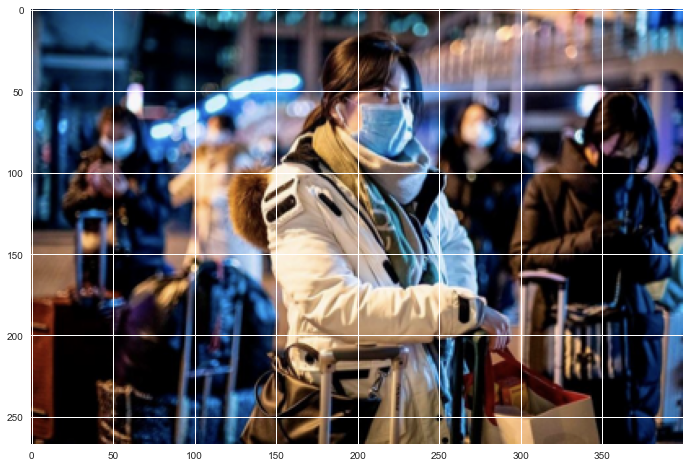

In [96]:
image_98_rgb = convert_to_RGB(image_98)
render_image(image_98_rgb)

In [42]:
image_98_df = train_df[train_df['file'] == 'maksssksksss98']
image_98_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
4065,196,43,236,91,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4065.png
4066,41,73,65,95,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4066.png
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png


### List all the label of image

In [43]:
with_mask_list, without_mask_list, incorrectly_worn_list = [], [], []
for i in range(len(image_98_df)):
    bounding_box = [image_98_df['xmin'].iloc[i], image_98_df['ymin'].iloc[i],
                    image_98_df['xmax'].iloc[i], image_98_df['ymax'].iloc[i]]
    if image_98_df['label'].iloc[i] == 'with_mask':
        with_mask_list.append(bounding_box)
    elif image_98_df['label'].iloc[i] == 'without_mask':
        without_mask_list.append(bounding_box)
    else:
        incorrectly_worn_list.append(bounding_box)
        
found_objects_dict = {'With Mask': with_mask_list, 
                      'Without Mask': without_mask_list, 
                      'Incorrectly Worn': incorrectly_worn_list}
found_objects_dict

{'With Mask': [[196, 43, 236, 91],
  [41, 73, 65, 95],
  [263, 62, 287, 85],
  [344, 80, 377, 106]],
 'Without Mask': [],
 'Incorrectly Worn': []}

In [44]:
for key, value in found_objects_dict.items():
    for i in range(len(value)):
        color = (0, 255, 0) # green
        text = 'Mask'
        if key == 'Without Mask':
            color = (255, 0, 0) # red
            text = 'No Mask'
        elif key == 'Incorrectly Worn':
            color = (255, 255, 0) # yellow
            text = 'Incorrect'
        start_point = (value[i][0], value[i][1])
        end_point = (value[i][2], value[i][3])
        cv2.rectangle(image_98_rgb, start_point, end_point, color = color, thickness = 2)
        cv2.putText(image_98_rgb, org = (value[i][0] - 8, value[i][1] - 3), text = text, 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = color)

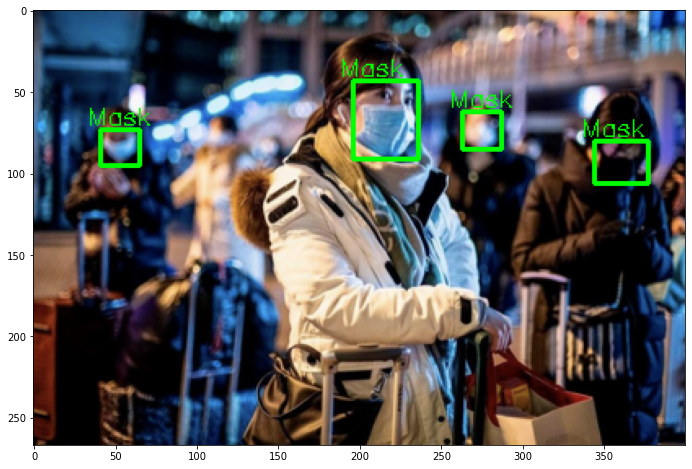

In [45]:
render_image(image_98_rgb)

In [46]:
train_df['label'].value_counts()

with_mask                2651
without_mask              521
mask_incorrectly_worn     100
Name: label, dtype: int64

In [47]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,label,count
0,with_mask,2651
1,without_mask,521
2,mask_incorrectly_worn,100


### Data visualisation
Here we can there is a high volumn of with mask and very low in mask wear incorrectly which might cause the strong bias, but hopefully, at least there are 123 labls wear incorrectly.

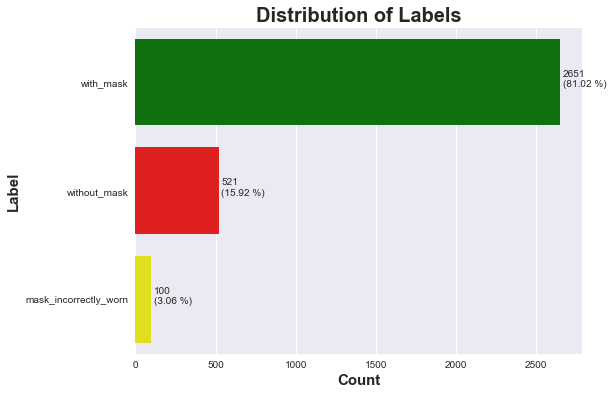

In [48]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal', 
                      palette = ['green', 'red', 'yellow'])
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [50]:
cropped_image_path = 'E:/jupyterdoc/archive/cropped_images/' + train_df['cropped_image_file'].iloc[0]
cropped_image = cv2.imread(cropped_image_path)
cropped_image.shape

(12, 12, 3)

In [51]:
image_width = []
image_height = []
for i in range(len(train_df)):
    cropped_image_path = 'E:/jupyterdoc/archive/cropped_images/' + train_df['cropped_image_file'].iloc[i] 
    cropped_image = cv2.imread(cropped_image_path)
    image_width.append(cropped_image.shape[0])
    image_height.append(cropped_image.shape[1])

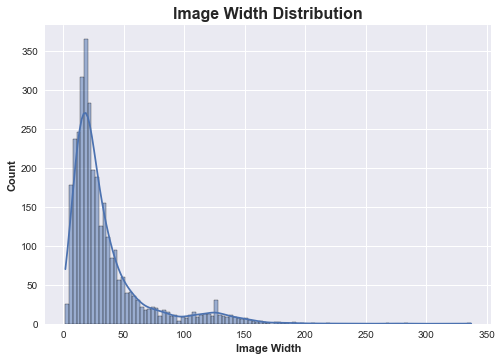

In [52]:
sns.histplot(image_width, kde = True)
plt.title('Image Width Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Width', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

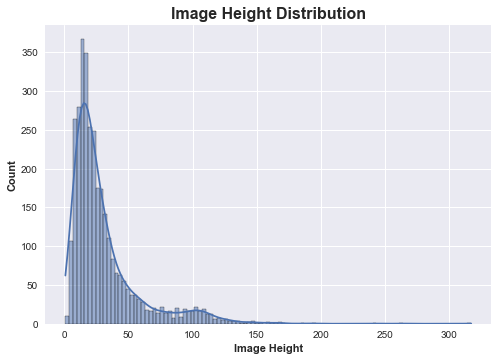

In [53]:
sns.histplot(image_height, kde = True)
plt.title('Image Height Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Height', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

In [54]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}')
print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 337
Mean: 34.65739608801956
Median: 23.0
IMAGE HEIGHT
Min: 1
Max: 317
Mean: 30.802261613691932
Median: 22.0


In [55]:
image_target_size = (int(np.median(image_width)), int(np.median(image_height)))
image_target_size

(23, 22)

In [67]:
train_df[ 'cropped_image_file']

800     maksssksksss253.png
801     maksssksksss253.png
802     maksssksksss253.png
803     maksssksksss253.png
804     maksssksksss254.png
               ...         
4067     maksssksksss98.png
4068     maksssksksss98.png
4069     maksssksksss99.png
4070     maksssksksss99.png
4071     maksssksksss99.png
Name: cropped_image_file, Length: 3272, dtype: object

## Data preprocessing 
convert image into np array and convert its corresponding label (categorical attribute) to numeric attribute 

Without mask: 0, With mask: 1, Wear incorrectly: 2

In [56]:
from keras_preprocessing.image import ImageDataGenerator

In [57]:
train_image_generator = ImageDataGenerator(rescale = 1. / 255.)

In [58]:
train_image_generator

In [63]:
train_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = 'E:/jupyterdoc/archive/cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'training',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 3272 validated image filenames belonging to 3 classes.


In [64]:
valid_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory =  'E:/jupyterdoc/archive/cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 0 validated image filenames belonging to 3 classes.


In [65]:
test_image_generator = ImageDataGenerator(rescale = 1. / 255.)

test_generator = train_image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory =  'E:/jupyterdoc/archive/cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


In [78]:
print(train_generator)
print(valid_generator)
print(test_generator)

In [66]:
class_ind=train_generator.class_indices

In [67]:
test_generator.class_indices

{'mask_incorrectly_worn': 0, 'with_mask': 1, 'without_mask': 2}

In [68]:
input_shape = [int(np.median(image_width)), int(np.median(image_height)), 3]

## Apply the model to train the dataset

In [69]:
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', 
                        input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [70]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

history_1 = model_1.fit(train_generator, epochs = 10, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator))

  ...
    to  
  ['...']
Train for 103 steps
Epoch 1/10
103/103 [==============================] - 2s 15ms/step - loss: 0.5639 - accuracy: 0.8096 - recall: 0.7320
Epoch 2/10
103/103 [==============================] - 1s 12ms/step - loss: 0.3899 - accuracy: 0.8408 - recall: 0.8059
Epoch 3/10
103/103 [==============================] - 1s 12ms/step - loss: 0.2540 - accuracy: 0.9254 - recall: 0.9031
Epoch 4/10
103/103 [==============================] - 1s 12ms/step - loss: 0.2279 - accuracy: 0.9285 - recall: 0.9215
Epoch 5/10
103/103 [==============================] - 1s 12ms/step - loss: 0.2063 - accuracy: 0.9340 - recall: 0.9239
Epoch 6/10
103/103 [==============================] - 1s 12ms/step - loss: 0.1922 - accuracy: 0.9367 - recall: 0.9300
Epoch 7/10
103/103 [==============================] - 1s 12ms/step - loss: 0.1824 - accuracy: 0.9392 - recall: 0.9340
Epoch 8/10
103/103 [==============================] - 1s 12ms/step - loss: 0.1841 - accuracy: 0.9395 - recall: 0.9364
Epoch 9/10


## Result : Display with evaluated metric, like accuracy, f1 score and precision etc.

In [71]:
result_1 = pd.DataFrame(history_1.history)
result_1

,loss,accuracy,recall
0,0.566440,0.809597,0.731968
1,0.391561,0.840770,0.805929
2,0.253723,0.925428,0.903117
3,0.226169,0.928484,0.921455
4,0.205515,0.933985,0.923900
5,0.191615,0.936736,0.930012
6,0.181486,0.939181,0.933985
7,0.183789,0.939487,0.936430
8,0.176697,0.937347,0.935208
9,0.173824,0.941626,0.937653


<AxesSubplot:>

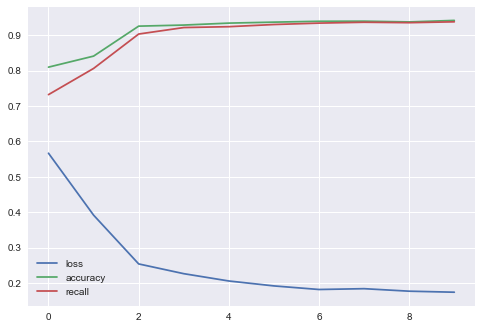

In [72]:
result_1.plot()

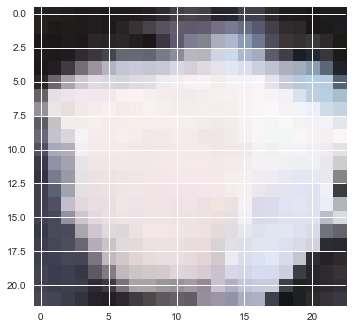

In [75]:
sample_mask_img = cv2.imread('E:/jupyterdoc/archive/cropped_images/maksssksksss0-1.png',1)
sample_mask_img = cv2.resize(sample_mask_img,(23,22))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,23,22,3])
sample_mask_img = sample_mask_img/255.0

In [76]:
model_1.predict(sample_mask_img)

array([[1.1521615e-03, 9.9816221e-01, 6.8566803e-04]], dtype=float32)

In [77]:
pred_val=np.argmax(model_1.predict(sample_mask_img))

In [79]:
class_ind

{'mask_incorrectly_worn': 0, 'with_mask': 1, 'without_mask': 2}

In [80]:
y_pred=[]
for i,j in class_ind.items():
    if pred_val==j:
        print(i)
        print(j)
        y_pred.append(i)

with_mask
1


In [81]:
y_pred

['with_mask']

In [123]:
mask_label = {0:'INCORRECT WEAR MASK',1:'MASK',2:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0),2:(0,0,255)}

In [82]:
test_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-1.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-2.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-4.png
...,...,...,...,...,...,...,...,...,...,...,...
795,191,76,208,96,with_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-795.png
796,174,125,203,156,with_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-796.png
797,209,124,237,151,with_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-797.png
798,194,181,233,216,with_mask,maksssksksss253,400,300,maksssksksss253.xml,maksssksksss253.png,maksssksksss253-798.png


In [83]:
image_0_df = test_df[test_df['file'] == 'maksssksksss0']
image_0_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-1.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-2.png


In [84]:
test_image = cv2.imread('E:/jupyterdoc/archive/images/maksssksksss0.png',1)

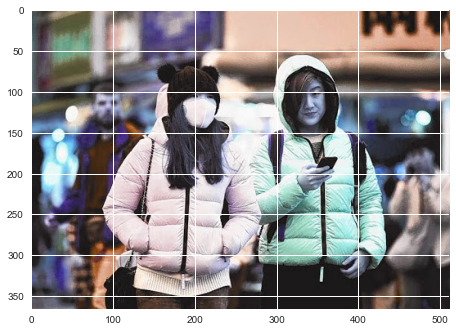

In [85]:
plt.imshow(test_image)

In [132]:
bounding_box = [image_0_df['xmin'].iloc[0], image_0_df['ymin'].iloc[0],
                    image_0_df['xmax'].iloc[0], image_0_df['ymax'].iloc[0]]
bounding_box

[79, 105, 109, 142]

In [86]:
point_save = []
label_save = []
for i in range(len(image_0_df)):
    bounding_box = [image_0_df['xmin'].iloc[i], image_0_df['ymin'].iloc[i],
                    image_0_df['xmax'].iloc[i], image_0_df['ymax'].iloc[i]]
    point_save.append(bounding_box)
    file_name = 'E:/jupyterdoc/archive/cropped_images/maksssksksss0' + '-' + str(i) +'.png' 
    img = cv2.imread(file_name,1)
    img = cv2.resize(img,(23,22))
    img = np.reshape(img,[1,23,22,3])
    img = img/255.0
    model_1.predict(img)
    pred_val=np.argmax(model_1.predict(img))
    label_save.append(pred_val)

In [90]:
for i in range(len(cropped_images_files)):
    file_name = 'E:/jupyterdoc/archive/cropped_images/' + cropped_images_files[i]
    img = cv2.imread(file_name,1)
    img = cv2.resize(img,(23,22))
    img = np.reshape(img,[1,23,22,3])
    img = img/255.0
    model_1.predict(img)
    pred_val=np.argmax(model_1.predict(img))
    if pred_val != 1 and cropped_images_files[i] in list(test_df['file']):
        print(cropped_images_files[i])
        break

0

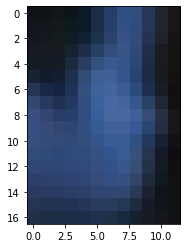

In [171]:
file_name = 'E:/jupyterdoc/archive/cropped_images/maksssksksss302-1141.png'
img = cv2.imread(file_name,1)
plt.imshow(img)
img = cv2.resize(img,(267,400))
img = np.reshape(img,[1,267,400,3])
img = img/255.0
model_1.predict(img)
pred_val=np.argmax(model_1.predict(img))
pred_val

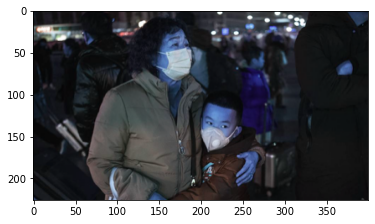

In [172]:
file_name = 'E:/jupyterdoc/archive/images/maksssksksss302.png'
img = cv2.imread(file_name,1)
plt.imshow(img)

## Discussion

The way that convolution works is that 2 images which can be parsed as matrices are multiplied to produce an output The basic architecture of a convolution model usually has 2 main parts, feature extraction and classification. In our model, the structure starts with 2 consecutive convolution layers, to extract and learn features, and pass it onto a pooling layer, which decreases the size of the convolved feature map to reduce the computational costs. Then, the above structure is repeated one more time, the corresponding result will be flattened and passed into a fully connected layer. And the final output layer will generate the result with 3 classification (with mask, without mask, wearing mask improperly).

Here we can see there is only 0.89 accuracy in average, so it performs bad and we won't consider it as the model and we don't depict too much, andn we don't visualise it on the photo. please see the MobileNetV2 as our final model.

# Reference
https://www.kaggle.com/code/akashkirodiwal/face-mask-detection-using-cnn